# Principal Component Analysis

## import library

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [232]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

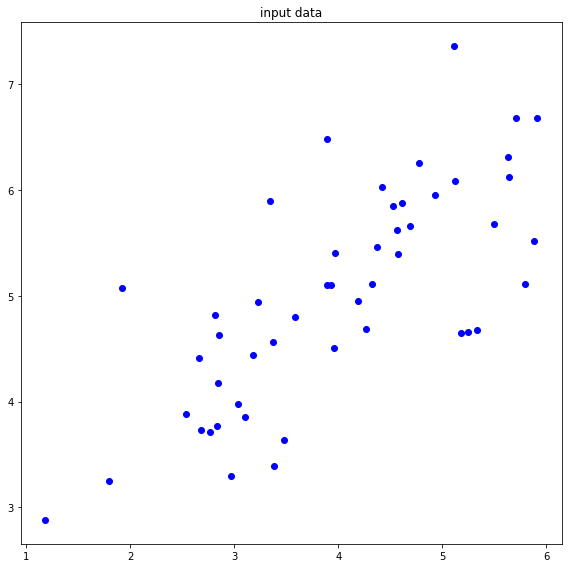

In [233]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [234]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature_normalize = feature - np.mean(feature , axis = 0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [235]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [236]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #Sigma= (1/len(feature)) * np.sum(np.inner(feature,feature))
    #feature_normalize=normalize(feature)
    #Sigma = np.cov(feature_normalize , rowvar = False)
    std=np.std(feature, axis = 0)
    feature=feature/std
    Sigma=(feature.T @ feature)/(feature.shape[0]-1)
    #X = (dataset - dataset.mean(axis=0))/dataset.std(axis=0)

    #cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [237]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cov_mat=compute_covariance(feature)
    global eig_vals
    global eig_vecs 
    eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T

    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

    # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # For further usage
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

    print(eig_pairs)
    principal_component_1=eig_pairs[0]
    principal_component_2=eig_pairs[1]


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

In [238]:
# cov_mat=compute_covariance(feature)
# eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

# max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
# signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
# eig_vecs = eig_vecs*signs[np.newaxis,:]
# eig_vecs = eig_vecs.T

# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
# eig_pairs.sort(key=lambda x: x[0], reverse=True)

# # For further usage
# eig_vals_sorted = np.array([x[0] for x in eig_pairs])
# eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

# principal_component_1=eig_pairs[0]
# principal_component_2=eig_pairs[1]

# print(principal_component_1)
# print(principal_component_2)

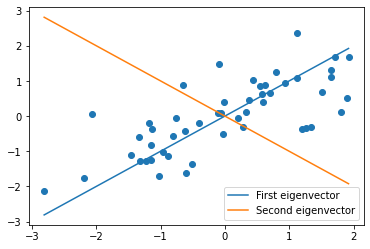

In [239]:
line = np.linspace(min_x, max_x, 1000)
plt.scatter(feature[:, 0],feature[:, 1])
plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector')
plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid', label='Second eigenvector')
plt.legend()
plt.show()

In [240]:
w_ord_indx = np.argsort(np.abs(eig_vals))[::-1]
feature_vector = eig_vecs[:,w_ord_indx[:1]]
T = feature @ feature_vector

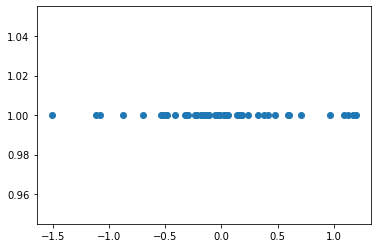

In [241]:
plt.scatter(T,[1]*len(T)) #Put this at height 1 to see our distribution well
plt.show()

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [242]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    projection=np.matmul(feature,vector)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [243]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

[(1.7709489835143186, array([0.70710678, 0.70710678])), (0.26986734301629334, array([-0.70710678,  0.70710678]))]


In [256]:
print(projection1.shape)

(50,)


In [267]:
(projection1.tolist())[0][:]

array([-2.21727029, -2.21727029])

---

---

## functions for presenting the results

---

---

In [244]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [245]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #




    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [246]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector')
    #plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid', label='Second eigenvector')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [247]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    #plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector')
    plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid', label='Second eigenvector')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [257]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    #plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector')
    plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid', label='Second eigenvector')
    projection1 = compute_projection_onto_line(feature, principal_component_1)
    plt.scatter(projection1[:, 0],projection1[:, 1])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [258]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [259]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [260]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


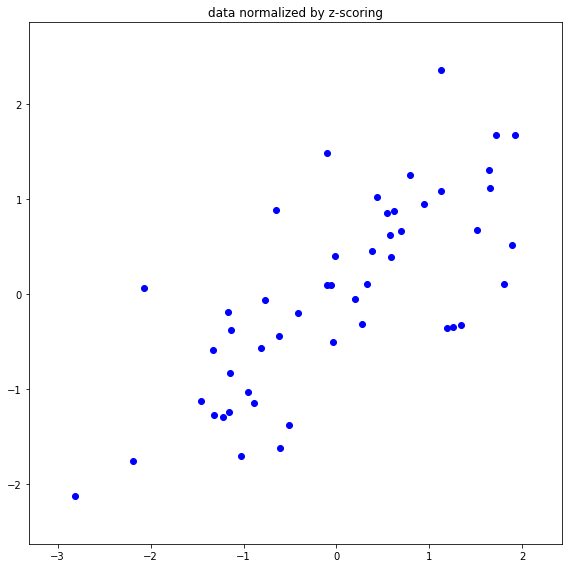

**************************************************
## [RESULT 02]
**************************************************


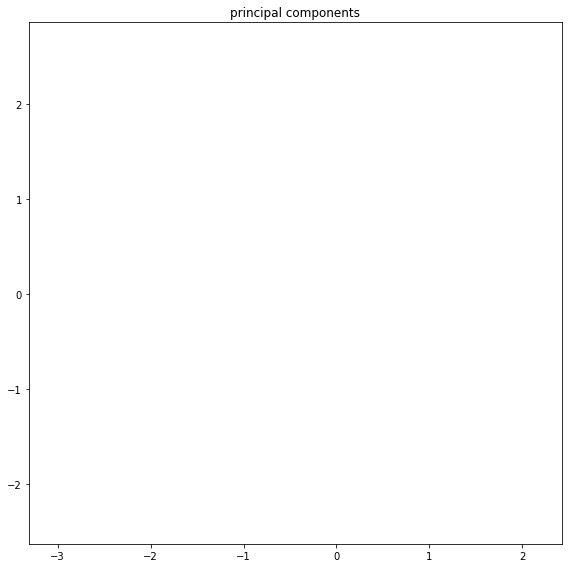

**************************************************
## [RESULT 03]
**************************************************


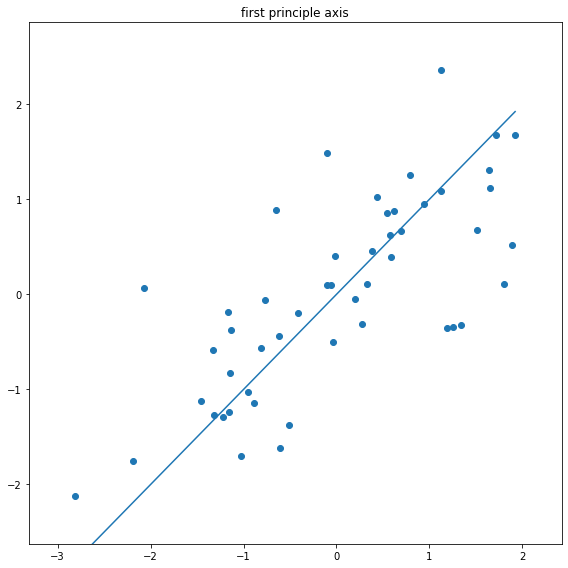

**************************************************
## [RESULT 04]
**************************************************


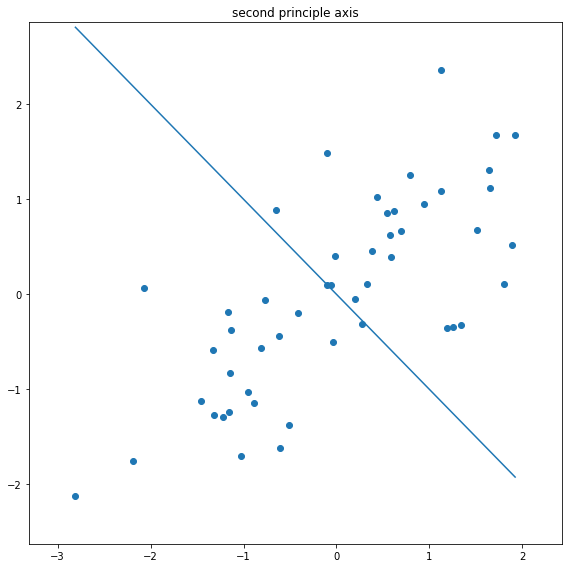

**************************************************
## [RESULT 05]
**************************************************


IndexError: too many indices for array

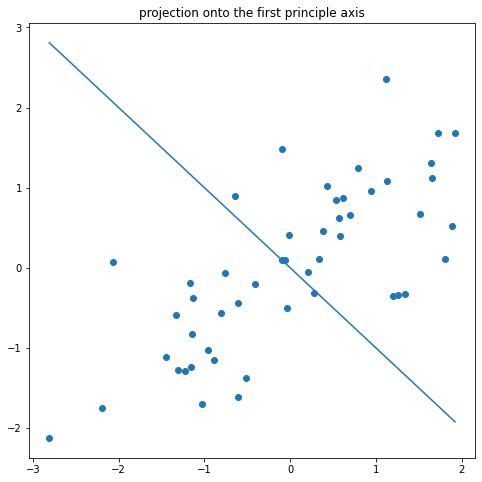

In [261]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)